1.- Data is a mess in terms of consistency in the entries.

2.- The date column is not following any format.

3.- We can see many issues when defining data like Sex, Species, Age, etc

4.- 


# Plan for cleaning and transforming the data.
.- We can sell a device or something to wear that helps swimmers or surfers get attacked by sharks.

.- Identify the time and places in which sharks are more commom. (Tomorrow we check these ones)

.- Are attacks ussualy provocked by one gender over the other? (from gender column)

.- Are sharks more willing to attack in the afternoon or evening? (from time column)

.- Are white shark attacks the most fatal ones? (from species column)

1.- The first column that we think we need to clean/fix we belive is the Age column. One possible solution is to modify Age to 0-10, 10-20, etc. So it compiles more information.

2.- Same approach can also go for Time column. We can change it to morning, afternoon, and evening

3.- Define where these attackas are happening and identify the gender and age that are more in risk.

4.- 

In [81]:
import pandas as pd
import numpy as np
import re
import math
import matplotlib.pyplot as plt

shark_attacks= pd.read_excel('https://www.sharkattackfile.net/spreadsheets/GSAF5.xls')

shark_attacks

display(shark_attacks.Age.nunique())


249

In [82]:
sum_shark= shark_attacks[["Year", "Type", "Country", "State", "Activity", "Sex", "Age", "Fatal Y/N", "Time", "Species "]]

sum_shark.columns= ["Year", "Type", "Country", "State", "Activity", "Sex", "Age", "Fatal_Y/N", "Time", "Species"]

words_pattern = r'boat|barque|drill|training|Lying|Floating|expedition|Exercises|Exercise|swimming|bathing|Paddle boarding|excercise|excercises|wreck|ship|rescuing|sank|plane|jump|jumping|disaster|disaster|fell|fall'
mask = sum_shark['Activity'].str.contains(words_pattern, case=False, na=False)
sum_shark.loc[mask, 'Activity'] = 'Swimming'

words_pattern2 = r'diving|dive'
mask2 = sum_shark['Activity'].str.contains(words_pattern2, case=False, na=False)
sum_shark.loc[mask2, 'Activity'] = 'Diving'

words_pattern3 = r'snorkeling|snorkelling'
mask3 = sum_shark['Activity'].str.contains(words_pattern3, case=False, na=False)
sum_shark.loc[mask3, 'Activity'] = 'Snorkeling'

words_pattern4 = r'spearfishing|fishing|Wading|shrimp|collecting|Lobstering|Spearishing|fish|star'
mask4 = sum_shark['Activity'].str.contains(words_pattern4, case=False, na=False)
sum_shark.loc[mask4, 'Activity'] = 'Fishing'

words_pattern5 = r'Kayaking|kayak|canoe|Sinking|dinghy|Yacht|boogie|rowing|cruising|Paddling|boarding|SUP|raft|mattress|inflatable|pool|sailing|skiing|ski'
mask5 = sum_shark['Activity'].str.contains(words_pattern5, case=False, na=False)
sum_shark.loc[mask5, 'Activity'] = 'Navigating'

words_pattern6 = r'surfing|kite|surf|seating'
mask6 = sum_shark['Activity'].str.contains(words_pattern6, case=False, na=False)
sum_shark.loc[mask6, 'Activity'] = 'Surfing'

words_pattern7 = r'shark|whale|stingray|dolphins|sharks|filming|research|researching'
mask7 = sum_shark['Activity'].str.contains(words_pattern7, case=False, na=False)
sum_shark.loc[mask7, 'Activity'] = 'Interacting_with_sharks'

sum_shark["Activity"]=sum_shark["Activity"].fillna("UNKNOWN")


# display(sum_shark.Activity.value_counts())



C:\Users\sheri\AppData\Local\Temp\ipykernel_1816\2592527806.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_shark["Activity"]=sum_shark["Activity"].fillna("UNKNOWN")


In [84]:
sum_shark["Fatal_Y/N"]=sum_shark["Fatal_Y/N"].str.replace(r'^y.*', "Y",case=False,regex=True)
sum_shark["Fatal_Y/N"]=sum_shark["Fatal_Y/N"].str.replace(r'^n.*', "N",case=False,regex=True)
sum_shark["Fatal_Y/N"]=sum_shark["Fatal_Y/N"].str.replace(r'^y.*', "Y",case=False,regex=True)
sum_shark["Fatal_Y/N"]=sum_shark["Fatal_Y/N"].str.replace("M", "UNKNOWN",case=False,regex=True)
sum_shark["Fatal_Y/N"]=sum_shark["Fatal_Y/N"].str.replace("F", "UNKNOWN",case=False,regex=True)
sum_shark["Fatal_Y/N"]=sum_shark["Fatal_Y/N"].fillna("UNKNOWN")


display(sum_shark["Fatal_Y/N"].unique())

C:\Users\sheri\AppData\Local\Temp\ipykernel_1816\1910469604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_shark["Fatal_Y/N"]=sum_shark["Fatal_Y/N"].str.replace(r'^y.*', "Y",case=False,regex=True)
C:\Users\sheri\AppData\Local\Temp\ipykernel_1816\1910469604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_shark["Fatal_Y/N"]=sum_shark["Fatal_Y/N"].str.replace(r'^n.*', "N",case=False,regex=True)
C:\Users\sheri\AppData\Local\Temp\ipykernel_1816\1910469604.py:3: SettingWithCopyWarning: 
A value i

array(['N', 'Y', 'UNKNOWN', ' N'], dtype=object)

In [87]:
sum_shark = sum_shark[sum_shark["Year"] > 1000]
# CLEANING COUNTRY
sum_shark["Country"] = sum_shark["Country"].str.strip()
sum_shark["Country"] = sum_shark["Country"].str.upper()
sum_shark["Country"] = sum_shark["Country"].replace({
    "BETWEEN PORTUGAL & INDIA": np.nan,
    "SAN DOMINGO": np.nan,
    "ADMIRALTY ISLANDS": np.nan,
    "RED SEA / INDIAN OCEAN": np.nan,
    "IRAN / IRAQ": np.nan,
    "SUDAN?": np.nan,
    "NORTH SEA": np.nan,
    "CORAL SEA": np.nan
})
sum_shark["Sex"] = sum_shark["Sex"].str.strip().str.upper()
sum_shark["Sex"] = sum_shark["Sex"].replace({
    'M': 'M',
    'M X 2': 'M',
    'F': 'F',
    'N': np.nan,
    'LLI': np.nan,
    '.': np.nan,
    "": np.nan
})

In [89]:
def clean_type(value):
    if pd.isna(value):
        return "Unknown"
    val = value.strip().lower()
    if "unprovoked" in val:
        return "Unprovoked"
    elif "provoked" in val:
        return "Provoked"
    elif "boat" in val:
        return "Boating"
    elif "watercraft" in val:
        return "Boating"
    elif "sea disaster" in val:
        return "Sea Disaster"
    else:
        return "Unknown"

sum_shark['Type'] = sum_shark['Type'].apply(clean_type)

In [91]:
def clean_species(value):
    if pd.isna(value):
        return "Unknown shark"
    val = value.lower().strip().replace("-","")
    if "?" in val or " or " in val:
        return "Unknown shark"
    elif "barracuda" in val:
        return "Barracuda"
    elif "whitetip reef" in val:
        return "Whitetip reef shark"
    elif "porbeagle" in val:
        return "Porbeagle shark"
    elif "whitetip" in val:
        return "Oceanic Whitetip shark"
    elif "white" in val or "carcharodon" in val:
        return "Great white shark"
    elif "bronze" in val or "copper" in val:
        return "Copper shark"
    elif "sandbar" in val:
        return "Sandbar shark"
    elif "sand" in val:
        return "Sandtiger shark"
    elif "tiger" in val or "galeocerdo" in val:
        return "Tiger shark"
    elif "caribbean" in val:
        return "Caribbean reef shark"
    elif "grey reef" in val:
        return "Grey reef shark"
    elif "blacktip reef" in val:
        return "Blacktip reef shark"
    elif "reef" in val:
        return "Reef shark"
    elif "blacktip" in val:
        return "Blacktip shark"
    elif "atlantic blacktip" in val:
        return "Atlantic Blacktip shark"
    elif "smooth" in val:
        return "Smoothhound shark"
    elif "silver" in val:
        return "Silvertip shark"
    elif "galapagos" in val:
        return "Galapagos shark"
    elif "raggedtooth" in val:
        return "Raggedtooth shark"
    elif "carpet" in val:
        return "Carpet shark"
    elif "basking" in val:
        return "Basking shark"
    elif "angel" in val:
        return "Angel shark"
    elif "broadnose" in val:
        return "Broadnose sevengill shark"
    elif "bull" in val:
        return "Bull shark"
    elif "dusky" in val:
        return "Dusky shark"
    elif "zambe" in val:
        return "Zambezi shark"
    elif "goblin" in val:
        return "Goblin shark"
    elif "thresher" in val:
        return "Thresher shark"
    elif "cow" in val:
        return "Cow shark"
    elif "dog" in val:
        return "Dogfish shark"
    elif "epaulette" in val:
        return "Epaulette shark"
    elif "mako" in val:
        return "Mako shark"
    elif "nurse" in val:
        return "Nurse shark"
    elif "sick" in val:
        return "Sicklefin shark"
    elif "lemon" in val:
        return "Lemon shark"
    elif "hammerhead" in val:
        return "Hammerhead shark"
    elif "blue" in val:
        return "Blue shark"
    elif "whaler" in val:
        return "Whaler shark"
    elif "whale" in val:
        return "Whale shark"
    elif "cookie" in val:
        return "Cookiecutter shark"
    elif "wobbegong" in val:
        return "Wobbegong shark"
    elif "spinner" in val:
        return "Spinner shark"
    elif "shovel" in val:
        return "Shovelnose shark"
    elif "salmon" in val:
        return "Salmon shark"
    elif "gill" in val:
        return "Sevengill shark"
    elif "small shark" in val:
        return "Small shark"
    elif "not stated" in val or "unknown" in val:
        return "Unknown shark"
    else:
        return "Other"

sum_shark['Species'] = sum_shark['Species'].apply(clean_species)

In [93]:
def normalize_and_categorize_time(time_series):
    # Step 1: Define known vague terms and map to standard HH
    vague_time_map = {
        'early morning': '06',
        'late morning': '11',
        'morning': '09',
        'daybreak': '09',
        'late afternoon': '17',
        'afternoon': '15',
        'noon': '12',
        'midday': '12',
        'lunch': '12',
        'evening': '19',
        'dusk': '18',
        'sunset': '18',
        'sundown': '18',
        'dawn': '05',
        'midnight': '00',
        'night': '21',
        'dark': '21'
    }

    def normalize_time(val):
        if pd.isna(val):
            return None
        val = str(val).lower().strip()
        # Replace vague terms
        for key in vague_time_map:
            if key in val:
                return vague_time_map[key]

        # Convert "14h30" → "14"
        match = re.search(r'\d{2}', val)
        if match:
            val = match.group()
        return val

    def categorize_time(time_str):
        try:
            if pd.isnull(time_str):
                return "Unknown"
            hour = int(time_str)
            if 5 <= hour < 12:
                return "Morning"
            elif 12 <= hour < 18:
                return "Afternoon"
            else:
                return "Night"
        except:
            return "Unknown"

    # Step 2: Apply normalization and categorization
    # 12:00 -> 12
    normalized = time_series.apply(normalize_time)
    # 12 -> Morning
    categorized = normalized.apply(categorize_time)
    return categorized

sum_shark['Time'] = normalize_and_categorize_time(sum_shark['Time'])


In [95]:
sum_shark['State'] = sum_shark['State'].fillna('No state')

#To clean some of the strange things
def clean_state(state):
    state = state.replace("?", "No state").replace("35º39 : 165º8'","No state").replace("22ºN, 88ºE","No state").replace("800 miles from land", " No State").replace("740 miles SE of Tarawa Atoll'","No State")
    return state
#filter states in US

#New data frame where is gonna enter the new cleans from State column (Function -> clean_state(state)).
sum_shark_state = sum_shark['State'].apply(clean_state)
sum_shark["State"].value_counts() #States más frecuentes
most_frequent_locations = list(sum_shark["State"].value_counts().head(15).index)
sum_shark["State"].isin(most_frequent_locations)

0        True
1        True
2        True
3       False
4        True
        ...  
6883     True
6884    False
6885    False
6886    False
6887     True
Name: State, Length: 6886, dtype: bool

In [97]:


def create_age_group(Age):
   
    if isinstance(Age, str) == False and math.isnan(Age):
        Age = "Unknown"

    try:
        Age = int(Age)
        if Age <= 14:
            return "Child"
        elif Age <= 24:
            return "Young"
        elif Age <= 39:
            return "Adult"
        elif Age <= 54:
            return "Middle"
        else:
            return "Elder"
    except:
        Age = Age.replace("?","Unknown").replace("+","").replace("Middle age","Middle").replace("No Age","Unknown")
        Age = Age.replace("20/30","Youth").replace("!","1").replace("Teen","Child").replace("40+","Middle")
        Age = Age.replace("13 or 14","Child").replace("2½","Child").replace("31 or 33","Adult").replace("10 or 12","Child")
        Age = Age.replace("?    &   14'","Child").replace("A.M.","Child").replace("36 & 23","Adult").replace("9 or 10","Child")
        Age = Age.replace("Both 11","Child").replace("F","Child").replace("17 & 16","Youth").replace("7 or 8","Child")
        Age = Age.replace("2 to 3 months","Child").replace("33 & 26","Adult").replace("36 & 23","Adult").replace("34 & 19","Adult")
        Age = Age.replace("13 or 18","Youth").replace("middle-age","Adult").replace("17 & 35","Adult").replace("50 & 30","Middle")
        Age = Age.replace("30 & 32","Adult").replace("24 & 35","Adult").replace("? & 2","Child").replace("25 or 28","Adult")
        Age = Age.replace("\xa0 ", "Unknown").replace("(adult)","Adult").replace("MAKE LINE GREEN","Unknown").replace("Ca. ","")
        Age = Age.replace("teen","Youth").replace("X","Unknown").replace("23 & 26","Youth").replace("18 months","Child").replace("M","Unknown")
        Age = Age.replace("9 months","Child").replace("9 & 60","Unknown").replace("a minor","Child").replace("21 or 26", "Youth")
        Age = Age.replace("18 to 22","Youth").replace("18 to 20","Youth").replace("30 or 36","Youth").replace("12 or 13","Child")
        Age = Age.replace("18 or 20", "Youth").replace("22, 57, 31","Unknown").replace("25 to 35","Adult").replace("mid-20s","Youth")
        Age = Age.replace("mid-30s","Adult").replace("6½","Child").replace("30","Adult").replace("40","Adult").replace("60","Middle").replace("30s","Adult")
        Age = Age.replace("20s","Youth").replace("12","Child").replace("50s","Middle").replace("40s","Adult").replace("60","Middle").replace("30s","Adult")
        Age = Age.replace("16","Youth").replace("11","Youth").replace("45 and 15","Middle").replace("Middles","Middle").replace("20's","Youth").replace("AdultUnknown","Adult")
        Age = Age.replace("Childs","Child").replace("8 or 10","Youth").replace("33 or 37","Adult").replace("20Unknown","Middle").replace("Middle's","Middle").replace("16 to 18","Youth")
        Age = Age.replace("Elderly","Elder").replace("33","Adult").replace(">50","Elder").replace("adult","Adult").replace("21, 34,Adult","Youth").replace('"',"")
        Age = Age.replace("  ","Unkown").replace("Youth to 18", "Youth").replace(" ","Unkown").replace("Unknowniddle","Middle").replace("Unkown","Unknown").replace("Youth","Young").replace("young","Young").replace("Adults","Adult")
        
        
        if "&" in Age:
            
            Age = "Unknown"
        
        return Age


sum_shark['Age_group'] = sum_shark['Age'].apply(create_age_group)
display(sum_shark.Age_group.unique())

array(['Child', 'Adult', 'Elder', 'Middle', 'Young', 'Unknown'],
      dtype=object)

In [99]:
# sum_shark.isnull().value_counts()

sum_shark[sum_shark['Country'] == 'USA'].groupby(["Sex",'Type']).size().reset_index(name='Fatal_Count').sort_values(by='Fatal_Count', ascending=False).reset_index(drop=True).head((4))

,Sex,Type,Fatal_Count
0,M,Unprovoked,1582
1,F,Unprovoked,362
2,M,Provoked,204
3,M,Unknown,155


In [101]:
sum_shark[sum_shark['Country'] == 'USA'].groupby(["State","Fatal_Y/N"]).size().reset_index(name='Fatal_Count').sort_values(by='Fatal_Count', ascending=False).reset_index(drop=True).head((4))

,State,Fatal_Y/N,Fatal_Count
0,Florida,N,1058
1,California,N,271
2,Hawaii,N,252
3,South Carolina,N,141


In [103]:
sum_shark[sum_shark['State'] == 'Florida'].groupby(["State","Activity","Time","Sex"]).size().reset_index(name='Fatal_Count').sort_values(by='Fatal_Count', ascending=False).reset_index(drop=True).head((5))

,State,Activity,Time,Sex,Fatal_Count
0,Florida,Surfing,Afternoon,M,183
1,Florida,Surfing,Morning,M,123
2,Florida,Surfing,Unknown,M,81
3,Florida,Swimming,Afternoon,M,71
4,Florida,Fishing,Afternoon,M,67


In [105]:
sum_shark.describe(include=["O"])


,Type,Country,State,Activity,Sex,Age,Fatal_Y/N,Time,Species,Age_group
count,6886,6833,6886,6886,6311,4010,6886,6886,6886,6886
unique,5,197,907,240,2,248,4,4,47,6
top,Unprovoked,USA,Florida,Swimming,M,16,N,Unknown,Unknown shark,Unknown
freq,5063,2543,1179,1923,5522,91,4823,3473,3189,2905


In [107]:
sum_shark[sum_shark['State'] == 'Florida'].groupby(["Activity","Sex"]).size().reset_index(name='Fatal_Count').sort_values(by='Fatal_Count', ascending=False).reset_index(drop=True).head((5))

,Activity,Sex,Fatal_Count
0,Surfing,M,412
1,Fishing,M,163
2,Swimming,M,163
3,Swimming,F,57
4,UNKNOWN,M,52


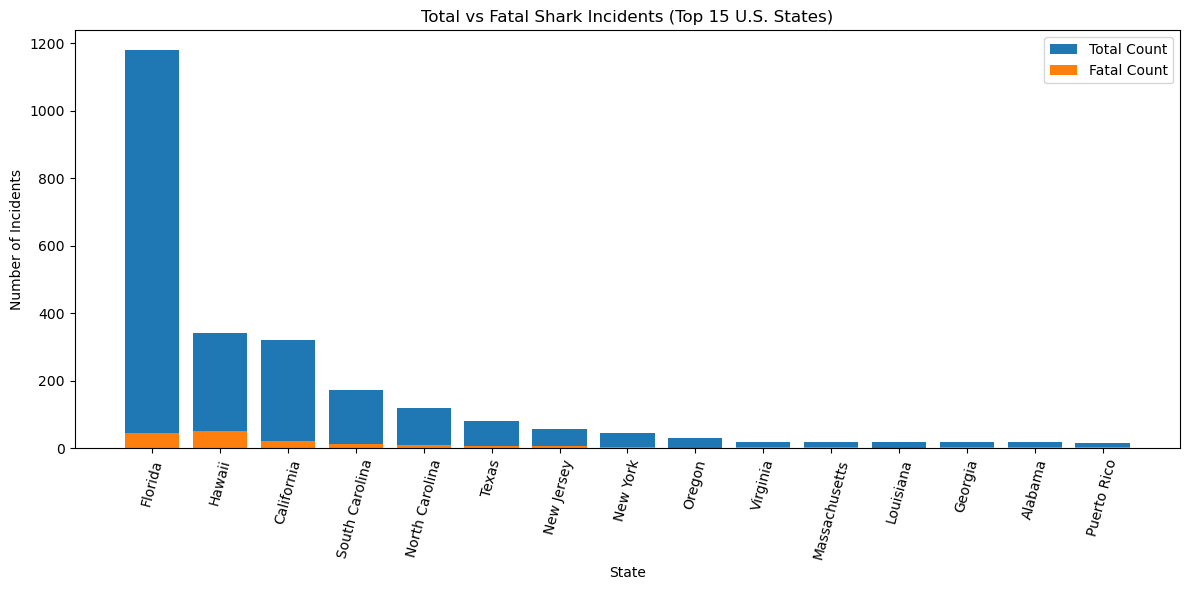

In [109]:

# Filter USA
usa = sum_shark[sum_shark['Country'] == 'USA']
# Total incidents by state
df_total = usa.groupby('State').size().reset_index(name='Total_Count')
# Fatal incidents by state
df_fatal = usa[usa['Fatal_Y/N'] == 'Y'].groupby('State').size().reset_index(name='Fatal_Count')
# Merge and clean
df_plot = pd.merge(df_total, df_fatal, on='State', how='left').fillna(0)
df_plot = df_plot.sort_values(by='Total_Count', ascending=False).head(15)
# Plot
plt.figure(figsize=(12, 6))
plt.bar(df_plot['State'], df_plot['Total_Count'], label='Total Count')
plt.bar(df_plot['State'], df_plot['Fatal_Count'], label='Fatal Count')
plt.xticks(rotation=75)
plt.title('Total vs Fatal Shark Incidents (Top 15 U.S. States)')
plt.xlabel('State')
plt.ylabel('Number of Incidents')
plt.legend()
plt.tight_layout()
plt.show()



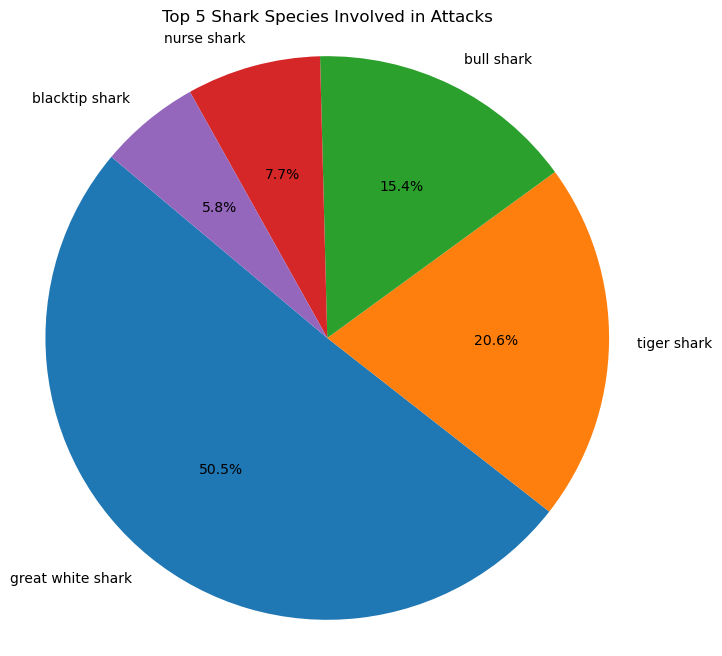

In [111]:

species_counts = (
    sum_shark['Species']
    .str.lower()
    .str.strip()
    .replace('unknown shark', pd.NA)
    .replace('other', pd.NA)
    .value_counts()
    .head(5)  # Top 5 species
)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Shark Species Involved in Attacks')
plt.axis('equal')  # Equal aspect ratio makes pie a circle
plt.show()

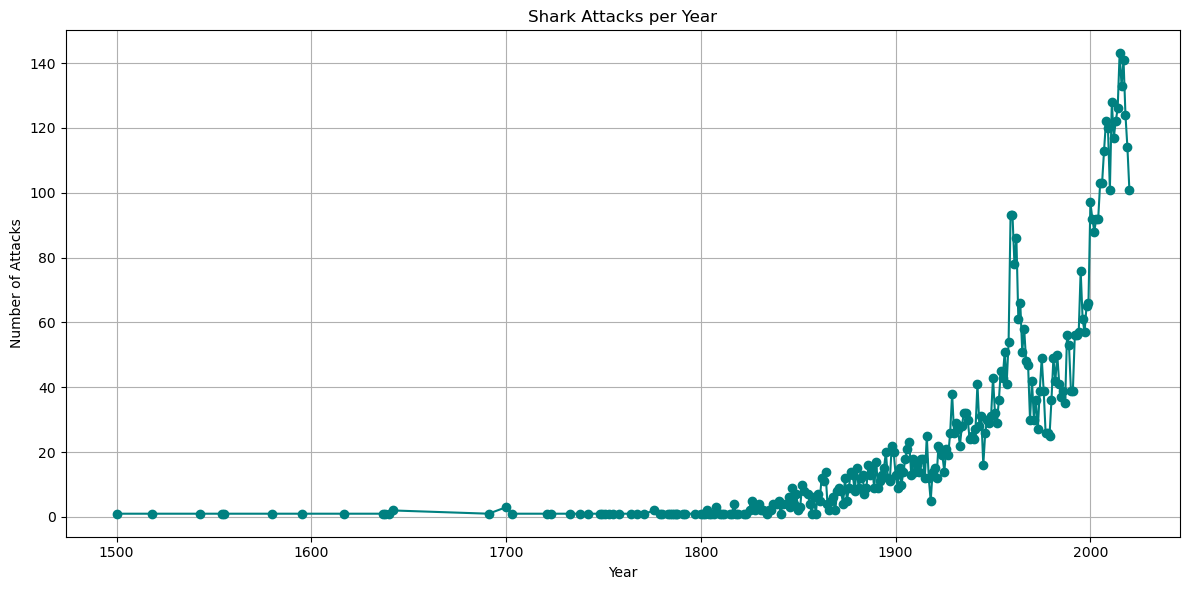

In [77]:


sum_shark['Year'] = pd.to_numeric(shark_attacks['Year'], errors='coerce')

sum_shark = sum_shark[sum_shark['Year'] <= 2020]
attacks_per_year = sum_shark['Year'].value_counts().sort_index()
# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(attacks_per_year.index, attacks_per_year.values, marker='o', color='teal')
plt.title('Shark Attacks per Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.tight_layout()
plt.show()